Question brief: create an appropriate model to **predict city and highway mpg**.

In [5]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

%matplotlib inline

**Step 1:** Loading relevant packages for analysis: Pandas,  sklearn, matplotlib ect..

In [6]:
cars = pd.read_csv("C:/Users/j.alexander1/Desktop/PYTHON/GeneralAssembly/CLASS MATERIALS/14 Materials-Project3/data/mpg.csv")

In [7]:
cars.head(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,compact


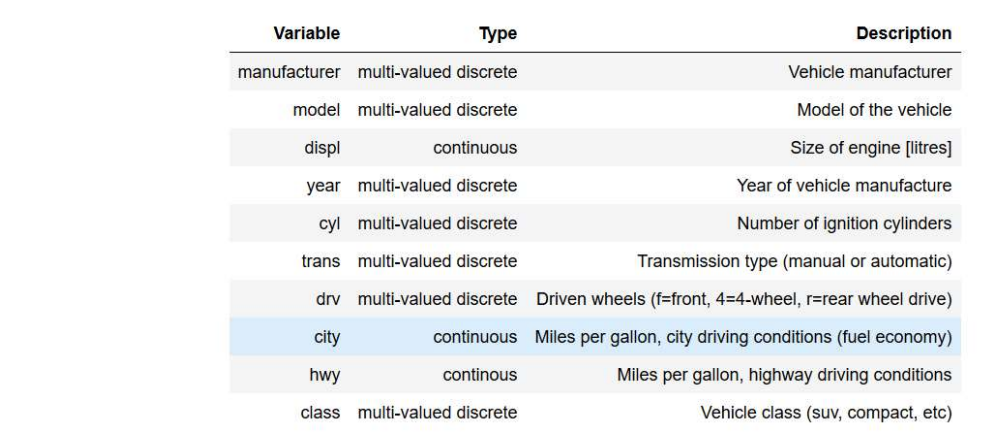

In [8]:
cars.shape

(234, 10)

In [9]:
cars.dtypes

manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
class            object
dtype: object

In [10]:
cars.isnull().values.any()

False

**Step 2:** Load data and asses data types, size of dataset and if any null values present.

In [11]:
cars.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


**Step 3:** Basic overview of data set 'continuous' variables. Variables of interest which include 'Miles per Gallon' (mpg) are **cty** and **hwy**. Remeber project brief - we are attempting to predict highway mpg and city mpg. We therefore have 2 Y values to predict, requiring two models. 

**Step 4:** Notice there seems to be some high varability in the cty / hwy. 3x Standard Deviations do not cover the 75th percentile for either cty or hwy. Quickly plot data via a histogram to look at distribution: 

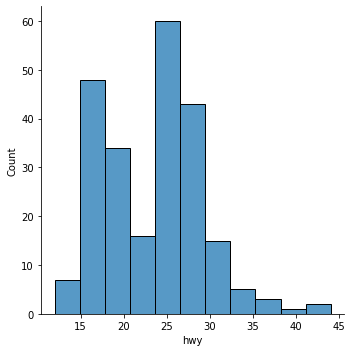

In [12]:
sns.displot(cars, x="hwy")

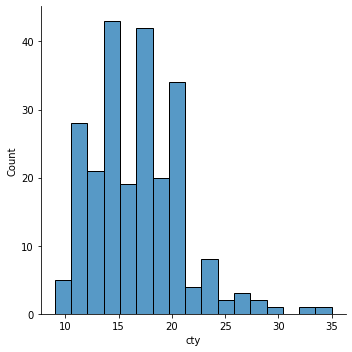

In [13]:
sns.displot(cars, x="cty")

**Analysis:** Both datasets appear multi-modal, with more than one 'peak' in the histogram

**Step 5:** Plot a correlation matrix to review correlation between out numeric variables and the dependent variables (cty / hwy)

<AxesSubplot:>

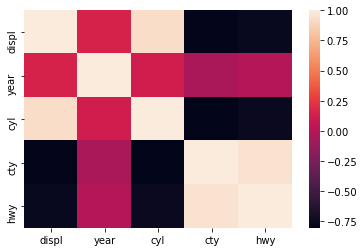

In [14]:
sns.heatmap(cars.corr())

**Analysis:** 

* Correlation between cty/hwy is near perfect, as is their correlation to the other variables. The therefore largely represent the same feature. As such, for the next few steps, I will drop hwy to focus exclusively on cty.
* Year has a weaker correlation than anticipated.
* displ (size of engine) and cyl (number of ignition cylinders) have a high-negative correlation. However, both largely refer to engine as a car feature, and may therefore be an example of multicollinearity.
* The other variables are not present here, due to being categoricals, and not numeric in their raw form. This represents 50% of the data set (5/10 columns), so would be worth assigning dummy variables and exploring their impact on cty.

**Step 6:** Create dummy variables. Dummies will create a column for each variance in discrete values. Meaning columns 'manufacturer', 'model' and 'trans' may have too many distinct values to be coherently useful in the model. Therefore, I will select 'class' and 'year' (noticing that there are only two distinct years 1999/2008 in the dataset).

In [15]:
dummies = pd.get_dummies(cars[['drv', 'class']])
dummies

,drv_4,drv_f,drv_r,class_2seater,class_compact,class_midsize,class_minivan,class_pickup,class_subcompact,class_suv
0,0,1,0,0,1,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
229,0,1,0,0,0,1,0,0,0,0
230,0,1,0,0,0,1,0,0,0,0
231,0,1,0,0,0,1,0,0,0,0
232,0,1,0,0,0,1,0,0,0,0


**Step 7:** Concat dummies to orignal dataframe

In [16]:
merged = pd.concat([cars,dummies],axis='columns')
merged

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,class,drv_4,drv_f,drv_r,class_2seater,class_compact,class_midsize,class_minivan,class_pickup,class_subcompact,class_suv
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,compact,0,1,0,0,1,0,0,0,0,0
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,compact,0,1,0,0,1,0,0,0,0,0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,compact,0,1,0,0,1,0,0,0,0,0
3,audi,a4,2.0,2008,4,auto(av),f,21,30,compact,0,1,0,0,1,0,0,0,0,0
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,compact,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,midsize,0,1,0,0,0,1,0,0,0,0
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,midsize,0,1,0,0,0,1,0,0,0,0
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,midsize,0,1,0,0,0,1,0,0,0,0
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,midsize,0,1,0,0,0,1,0,0,0,0


In [17]:
final = merged.drop(['manufacturer','model','trans','drv','class'],axis='columns')
final

,displ,year,cyl,cty,hwy,drv_4,drv_f,drv_r,class_2seater,class_compact,class_midsize,class_minivan,class_pickup,class_subcompact,class_suv
0,1.8,1999,4,18,29,0,1,0,0,1,0,0,0,0,0
1,1.8,1999,4,21,29,0,1,0,0,1,0,0,0,0,0
2,2.0,2008,4,20,31,0,1,0,0,1,0,0,0,0,0
3,2.0,2008,4,21,30,0,1,0,0,1,0,0,0,0,0
4,2.8,1999,6,16,26,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,2.0,2008,4,19,28,0,1,0,0,0,1,0,0,0,0
230,2.0,2008,4,21,29,0,1,0,0,0,1,0,0,0,0
231,2.8,1999,6,16,26,0,1,0,0,0,1,0,0,0,0
232,2.8,1999,6,18,26,0,1,0,0,0,1,0,0,0,0


**Step 8:** Assign X & Y variables for model.

In [18]:
X = final.drop('cty',axis='columns')
X

,displ,year,cyl,hwy,drv_4,drv_f,drv_r,class_2seater,class_compact,class_midsize,class_minivan,class_pickup,class_subcompact,class_suv
0,1.8,1999,4,29,0,1,0,0,1,0,0,0,0,0
1,1.8,1999,4,29,0,1,0,0,1,0,0,0,0,0
2,2.0,2008,4,31,0,1,0,0,1,0,0,0,0,0
3,2.0,2008,4,30,0,1,0,0,1,0,0,0,0,0
4,2.8,1999,6,26,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,2.0,2008,4,28,0,1,0,0,0,1,0,0,0,0
230,2.0,2008,4,29,0,1,0,0,0,1,0,0,0,0
231,2.8,1999,6,26,0,1,0,0,0,1,0,0,0,0
232,2.8,1999,6,26,0,1,0,0,0,1,0,0,0,0


In [19]:
y = final[["cty"]]
y

,cty
0,18
1,21
2,20
3,21
4,16
...,...
229,19
230,21
231,16
232,18


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = .2, random_state = 42)

**Step 9:** Create model and fit train data.

In [21]:
reg = LinearRegression()
reg.fit(X_train,Y_train)

Y_pred = reg.predict(X_test)

In [26]:
final_columns = final[["displ", "year", "cyl","hwy", "drv_4", "drv_f", "drv_r", "class_2seater", "class_compact", "class_midsize", "class_minivan", "class_pickup", "class_subcompact", "class_suv"]]

**Step 10:** Check coefficient and intercept value.

In [23]:
reg.coef_

array([[ 0.11214918, -0.0313685 , -0.33965846,  0.73054958,  0.26523296,
         0.24664175, -0.51187471, -1.25683516, -0.47027749, -0.88834517,
        -0.08577229,  1.34776091,  0.28537741,  1.06809179]])

In [25]:
int = reg.intercept_
print(f'The Intercept of the model is: {int}')

The Intercept of the model is: [63.74287512]


**Step 11:** Evaluate model accuracy.

In [27]:
mse = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))

r2 = reg.score(X_test,Y_test)

print(f'The mean squared error is: {mse}')
print(f'The R Squared error is: {r2}')

The mean squared error is: 0.8120015775103238
The R Squared error is: 0.9472742341734987


**Step 12:** Accuracy looks pretty good!